<a href="https://colab.research.google.com/github/AndreMoura88/Heart_Attack/blob/main/Heart_Attack_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.1 Instalando/atualizando bibliotecas, reiciniando o "runtime" e importando bibliotecas para tratamento dos dados. Esta etapa é importante para atualizar a versão do matplotlib, habilitando alguns recursos inesistentes na versão atual do Colab. 

## *Installing/updating libraries, restarting the "runtime" and importing libraries for data processing. This step is important to update the matplotlib version, enabling some features not available in the current version of Colab.*

In [ ]:
! pip install sweetviz
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
#update matplotlib
!pip install matplotlib --upgrade
!pip install scipy --upgrade
import os
os.kill(os.getpid(), 9)

In [1]:
import pandas as pd
import numpy as np

# import sweetviz as sv
# from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly
from plotly import tools

In [2]:
# Importando datasets/ Dataset importing
df_heart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Heart_Attack_Analysis/heart.csv')

## 1.2 **Conhecendo o dataset** // *Knowing the dataset*


Informações sobre a base de dados/ *About this dataset* 
<br>

Para melhor acompanhamento das variáveis serão modificados seus nomes (o título terá uma preferência pelo idioma português) / <br> 
*For better monitoring of the variables, their names will be modified (the title will have a preference for the Portuguese language)*
<br><br>

1. **age** <br>
Idade do paciente / *Age of the patient*
<br>

2. **sex**<br>
Sexo do paciente/ *Sex of the patient*
* 0 = feminino/ *female*
* 1 = masculino/ *male*
<br><br>

3. **tipo_de_dor**<br>
 Tipo de dor no peito/ *Chest Pain type*<br>
 Angina é o nome dado para a dor no peito causada pela diminuição do fluxo de sangue no coração.
 <br> *Angina is the name given to chest pain caused by decreased blood flow to the heart.*
* 0 = assintomático/ *asymptomatic* 
* 1 = angina típica/ *typical angina*
* 2 = angina atípica/ *atypical angina* 
* 3 = sem dor angina/ *non-anginal pain*
<br><br>

4. **pres_art_repous**<br>
Pressão arterial em repouso / *resting blood pressure (in mm Hg)*
<br>

5. **colest**<br>
Colesterol em mg/dl obtido via sensor de IMC / *cholestoral in mg/dl fetched via BMI sensor* 
<br>

6. **acuc_sang_jejum**<br>
 Açúcar no sangue em jejum > 120 mg/dl / *fasting blood sugar > 120 mg/dl*
* 0 = Falso/ *False*
* 1 = Verdadeiro / *True*
<br><br>

7. **eletrc_desc**<br>
Resultados eletrocardiográficos em repouso / *resting electrocardiographic results*
* 0 = hypertrophy,  mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes / *showing probable or definite left ventricular hypertrophy by Estes' criteria*
* 1 = normal; 
* 2 = tendo anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão ST > 0,05 mV) / *having ST-T wave abnormality, (T wave inversions and/or ST elevation or depression of > 0.05 mV)*
<br><br>

8. **max_frq_card**<br>
Frequência cardíaca máxima alcançada / *maximum heart rate achieved* 
<br>

9. **ang_indz_exerc**<br>
angina induzida por exercício / *exercise induced angina*
* 0 = Não/ *No*
* 1 = Sim/ *Yes*
<br><br>

10. **ST_indz_exerc**<br>
Depressão de ST induzida por exercício em relação ao repouso / *ST depression induced by exercise relative to rest*
<br>

11. **pico_ST_exerc**<br>
A inclinação do pico do segmento ST do exercício / *the slope of the peak exercise ST segment*
* 0 = ascendente/ *upsloping*
* 1 = plano /*flat*
* 2 = descendente/ *downsloping*
<br><br>

12. **num_vasos**<br>
número de vasos principais  (0-3) / *number of major vessels*
<br>

13. **talassemia**<br>
talassemia (uma forma de anemia crônica)/ *thalassemia*
* 1 = fixed defect
* 2 = normal
* 3 = reversable defect
<br><br>

14. target : 
* 0 = menos chance de um ataque do coração / *less chance of heart attack*<br>
* 1 = maior chance de um ataque do coração / *more chance of heart attack*


##### 1.2.1 Pandas

In [ ]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Modificando nome das colunas/ *Modifying features names/*

In [3]:
df_heart = df_heart.rename(columns={'cp': 'tipo_de_dor', 'trtbps':'pres_art_repous', 'chol':'colest', 'fbs':'acuc_sang_jejum', \
                         'restecg':'eletrc_desc', 'thalachh':'max_frq_card', 'exng':'ang_indz_exerc', 'oldpeak':'ST_indz_exerc', \
                         'slp':'pico_ST_exerc', 'caa':'num_vasos', 'thall':'talassemia'})
# removendo linha duplicada/ Drop duplicates rows
df_heart = df_heart.drop_duplicates()

In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              302 non-null    int64  
 1   sex              302 non-null    int64  
 2   tipo_de_dor      302 non-null    int64  
 3   pres_art_repous  302 non-null    int64  
 4   colest           302 non-null    int64  
 5   acuc_sang_jejum  302 non-null    int64  
 6   eletrc_desc      302 non-null    int64  
 7   max_frq_card     302 non-null    int64  
 8   ang_indz_exerc   302 non-null    int64  
 9   ST_indz_exerc    302 non-null    float64
 10  pico_ST_exerc    302 non-null    int64  
 11  num_vasos        302 non-null    int64  
 12  talassemia       302 non-null    int64  
 13  output           302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Dataset não contém valores nulos e todos os valores são numéricos. Atenção as colunas que contém valores categóricos, já como numéricos.<br>

*Dataset does not contain null values and all values are numeric. Pay attention to the columns that contain categorical values, as numeric values.*

In [ ]:
df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
tipo_de_dor,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
pres_art_repous,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
colest,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
acuc_sang_jejum,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
eletrc_desc,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
max_frq_card,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
ang_indz_exerc,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
ST_indz_exerc,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


#### 1.2.2 Análise Univariada / *univariate analysis*

##### Plotly

Convertendo as varáveis categóricas em Object para ver a descrição no dataset sobre estas <br>

*Converting categorical variables into Object to see the description in the dataset about these*


In [ ]:
num = ['age', 'pres_art_repous', 'colest', 'max_frq_card', 'ST_indz_exerc']
cat = ['sex', 'tipo_de_dor', 'ang_indz_exerc', 'num_vasos', 'acuc_sang_jejum', 'eletrc_desc', 'pico_ST_exerc', 'talassemia', 'output']

In [ ]:
df_heart_cat = pd.DataFrame(df_heart).copy()
df_heart_cat[cat] = df_heart_cat[cat].astype(str)

In [ ]:
table_cat = ff.create_table(df_heart_cat.describe(include=['O']).T, index=True, index_title='Categorical columns')
for i in range(len(table_cat.layout.annotations)):
    table_cat.layout.annotations[i].font.size = 9
    
table_cat.update_layout(
    title_text = 'Statistics of the categorical columns',
    margin = {'t':50},
    template= "plotly_dark"
)
    
table_cat.show()

##### Utilizando o sweetviz 

In [ ]:
# cria o report / creates the report 
my_report = sv.analyze(df_heart) 
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### Pandas-profiling

In [ ]:
profile = ProfileReport(df_heart, title='HA_Analysis',
                 html={'style': {'full_width': True}}, sort=None)
profile

Alguns pontos chamam a atenção a partir da análise univariada utilizando o Plotly, Sweetviz eo Panda-Profiling:/ *Some points draw attention from the univariate analysis using Plotly, Sweetviz and Panda-Profiling*:
- 68,2% das amostras é do sexo masculino/ <br>*68.2% of the samples are male;*
- 85,1% das coletas não tinha açucar no sangue em jejum/ <br>*85.1% of the collections had no fasting blood sugar* (acuc_sang_jejum)
- 67,2% das induções por exercício apresentaram angina /<br> *67.2% of exercise inductions had angina* (ang_indz_exerc)
- Na descrição fornecida pelo dataset indica um range de quantidade de vasos de 0-3, no entanto temos registros de itens com 4 vasos. /<br>*In the description provided by the dataset, it indicates a range of vase quantity from 0-3, however we have records of items with 4 vases.*
- Outras feature com número de itens diferentes do que está na descrição são as colunas ```talassemia``` e a ```num_vasos```, que contém dois itens ```0``` e quatro itens ```4```, respectivamente. Segundo pesquisas sobre o dataset no site Kaggle.com se trata de valores ```Null```. Foi decidido removê-las dá análise. /<br> *Other features with a different number of items than what is in the description are the columns ```talassemia``` and ```num_vasos```, which contain two items ```0``` and four items ```4 ```, respectively. According to research on the dataset on the Kaggle.com site, these are ```Null``` values. It was decided to remove them from analysis.*
- Podemos considerar a variável target como balanceada: 54,3-45,7 / <br>*We can consider the target variable as balanced: 54.3-45.7*

In [4]:
df_heart = df_heart.drop(df_heart[df_heart.talassemia == 0].index).reset_index(drop=True)
df_heart = df_heart.drop(df_heart[df_heart.num_vasos == 4].index).reset_index(drop=True)
df_heart

,age,sex,tipo_de_dor,pres_art_repous,colest,acuc_sang_jejum,eletrc_desc,max_frq_card,ang_indz_exerc,ST_indz_exerc,pico_ST_exerc,num_vasos,talassemia,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
292,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
293,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
294,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### 1.2.3 Análise Bivariada

Confrontando algumas variáveis com a variável target. /<br>*Comparing some variables with the target variable*

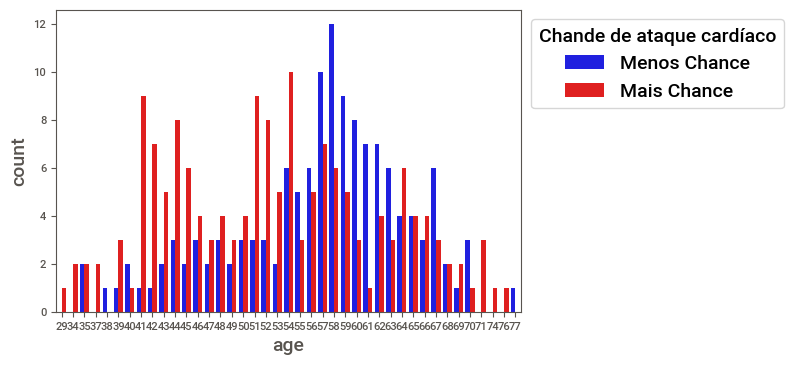

In [ ]:
g = sns.countplot(x = 'age', data = df_heart, hue = 'output',palette = ['b', 'r'])
g.legend (title='Chande de ataque cardíaco\nchance of having a heart attack', labels=['Menos Chance// less chance', 'Mais Chance// more chance'],
          bbox_to_anchor = (1, 1))
plt.rcParams["figure.figsize"] = (7,6)
plt.show()

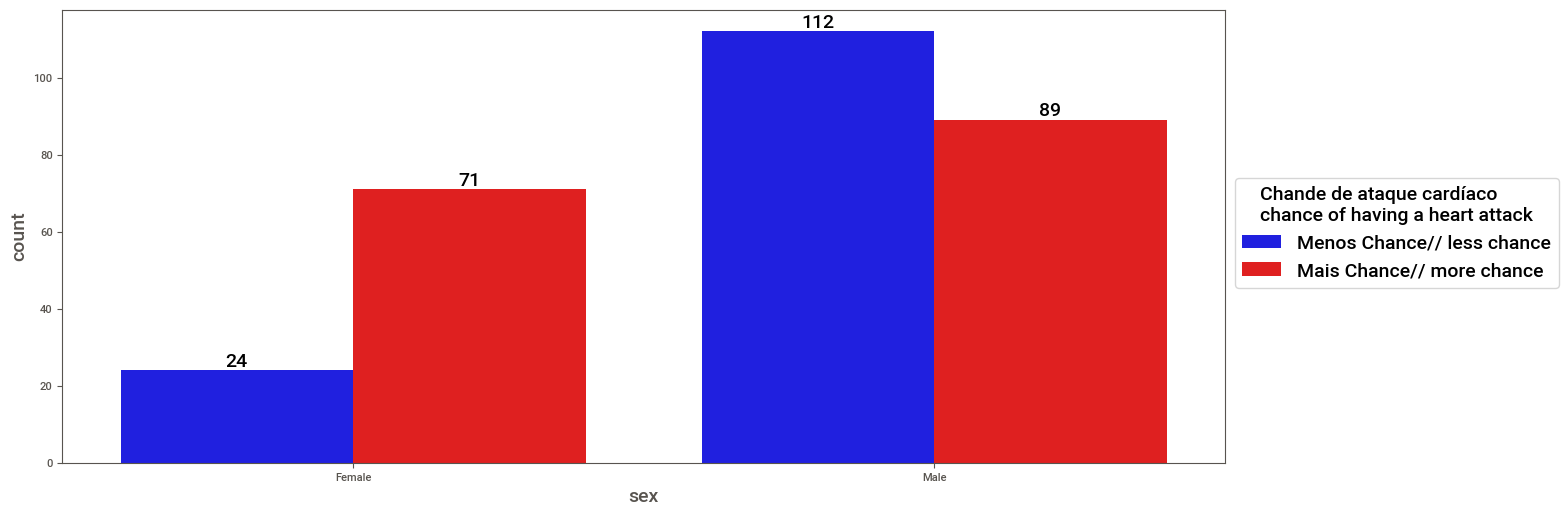

In [ ]:
g2 = sns.countplot(x = 'sex', 
                   data = df_heart, 
                   hue = 'output', 
                   palette = ['b', 'r'])

for container in g2.containers:
    g2.bar_label(container)

g2.legend (title='Chande de ataque cardíaco\nchance of having a heart attack', labels=['Menos Chance// less chance', 'Mais Chance// more chance'],
           bbox_to_anchor = (1, 0.65))

plt.rcParams["figure.figsize"] = (7,6)
plt.xticks(np.arange(2), ['Female', 'Male'])
plt.show()

Nas mulheres há uma taxa de 74,7% com mais chances de ter um ataque cardíaco, enquanto que nos homens a variação é menor e apenas 44,3% tem mais chance de ter um ataque. / <br>*In women there is a rate of 74.7% more likely to have a heart attack, while in men the variation is smaller and only 44.3% are more likely to have an attack.*

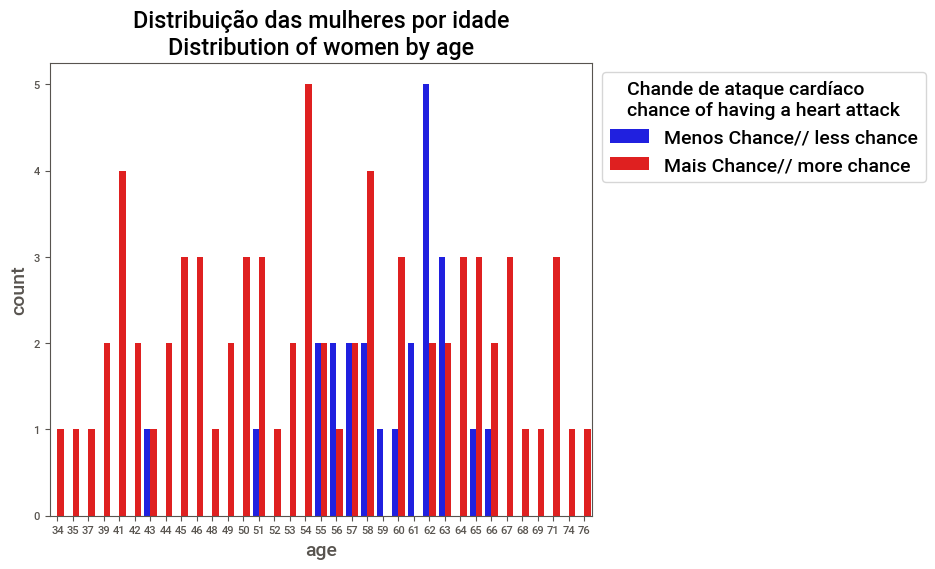

In [ ]:
g3 = sns.countplot(x = 'age', data = df_heart.query('sex==0'), hue = 'output',palette = ['b', 'r'])
g3.legend (title='Chande de ataque cardíaco\nchance of having a heart attack', labels=['Menos Chance// less chance', 'Mais Chance// more chance'],
          bbox_to_anchor = (1, 1))

plt.rcParams["figure.figsize"] = (7,6)

plt.title("Distribuição das mulheres por idade\nDistribution of women by age")
plt.show()

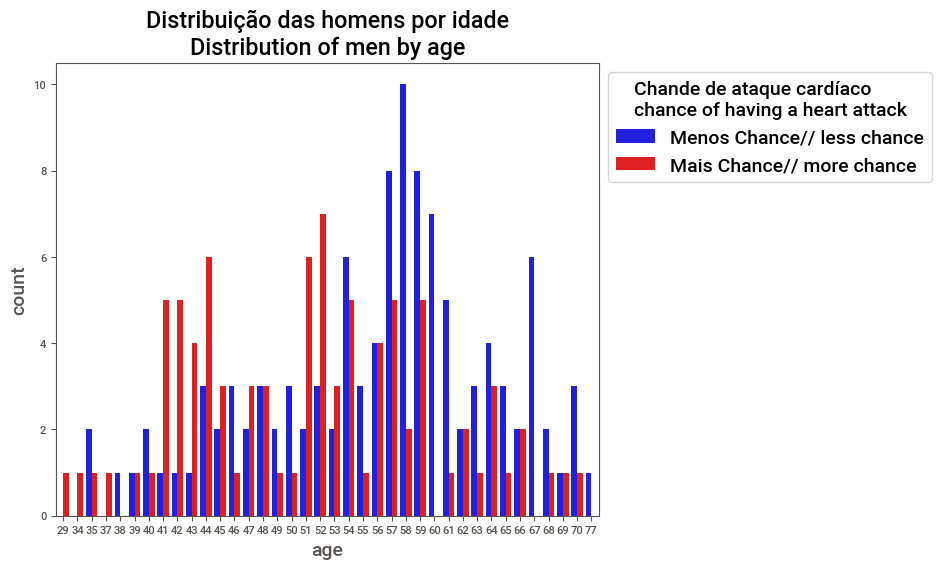

In [ ]:
g3 = sns.countplot(x = 'age', data = df_heart.query('sex==1'), hue = 'output',palette = ['b', 'r'])
g3.legend (title='Chande de ataque cardíaco\nchance of having a heart attack', labels=['Menos Chance// less chance', 'Mais Chance// more chance'],
          bbox_to_anchor = (1, 1))
plt.rcParams["figure.figsize"] = (7,6)
plt.title("Distribuição das homens por idade\nDistribution of men by age")
plt.show()

In [ ]:
g4 = sns.pairplot(df_heart, hue="output", palette=['b', 'r'])
plt.show()

## 2.0 Machine Learning

### 2.1 Bibliotecas
### Libraries

In [5]:
#Bibliotecas para o ML
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, \
                                    cross_val_predict, KFold, StratifiedKFold \
                                    

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, \
                            precision_score, ConfusionMatrixDisplay, \
                            classification_report, recall_score, roc_auc_score, \
                            roc_curve, precision_recall_curve, RocCurveDisplay, \
                            auc

### 2.2 Organizando o dataset

#### 2.2.1 Divisão das variáveis independentes e dependente
#### Split in X and y

In [11]:
features = df_heart.drop(['output'], axis=1).copy()
labels = df_heart.output

#### 2.2.2 Divisão do dataset em treino-teste (estratificado)
Split in train-test, stratified

In [12]:
# dividindo o dataset
# split
X_train, X_test, y_train, y_test= train_test_split(features, labels,
                                train_size=0.7,
                                random_state=42,
                                stratify=features["sex"]
                               )
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_remainder: {X_test.shape}, y_remainder: {y_test.shape}")

X_train: (207, 13), y_train: (207,)
X_remainder: (89, 13), y_remainder: (89,)


In [13]:
#verificando a proporção da estratificação
#checking the proportion of the stratified
display(X_train["sex"].value_counts()/len(X_train),
        X_test["sex"].value_counts()/len(X_test),         
        df_heart["sex"].value_counts()/len(df_heart)
        )

1    0.681159
0    0.318841
Name: sex, dtype: float64

1    0.674157
0    0.325843
Name: sex, dtype: float64

1    0.679054
0    0.320946
Name: sex, dtype: float64

### 2.3 Pipeline tunando a árvore de decisão

Usando a Bayesian Optimization ...
Bayesian Optmization: Um método utilizado para tunar os parâmetros do modelo é o GridSearch, porém nele você dá a mesma importância para todos os parâmetros, e na realidade isso nem sempre será útil. O resultado disso é um gasto de tempo desnecessário. Já com uma Random Search e a Bayesian Optmization é possível explorar dando mais importância aos parâmetros que afetam mais o score que se deseja otimizar.

---
Using Bayesian Optimization...
Bayesian Optimization: A method used to tune model parameters is GridSearch, but in it you give the same importance to all parameters, and in reality this will not always be useful. The result of this is an unnecessary waste of time. With a Random Search and Bayesian Optimization, it is possible to explore giving more importance to the parameters that most affect the score that you want to optimize.


Então já vamos aplicar o pipeline utilizando tanto uma Random Search quanto a Bayesian Optmization para treinar a árvore de decisão.

---
So let's apply the pipeline using both Random Search and Bayesian Optimization to train the decision tree.

In [7]:
!pip install scikit-optimize
from skopt import dummy_minimize, gp_minimize
from skopt.plots import plot_convergence

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.2 MB/s 


In [8]:
# definindo tipo das features
# defining feature type
num = ['age', 'ST_indz_exerc']
num_std_scl = ['pres_art_repous', 'colest', 'max_frq_card']
cat = ['sex', 'tipo_de_dor', 'ang_indz_exerc', 'num_vasos', 'acuc_sang_jejum', 
       'eletrc_desc', 'pico_ST_exerc', 'talassemia']

#tratamento das variáveis numéricas e categóricas
#treatment of numeric and categorical variables
t = [('cat', OneHotEncoder(handle_unknown='ignore'), cat)]

preprocessor = ColumnTransformer(transformers=t, remainder='passthrough')

In [90]:
# Criando um função com o pipeline para utilizar nos dois modelos
# Creating a function with the pipeline to use in both models

def treinar_modelo(params):
  criterion = params[0]
  max_depth = params[1]
  min_samples_leaf = params[2]

  print(params)
  
  pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('clf', DecisionTreeClassifier(criterion = criterion,
                                                      max_depth = max_depth,
                                                      min_samples_leaf = min_samples_leaf,
                                                      random_state=42)
                       )
                       ]
                )
  
  pipe.fit(X_train, y_train)

  p = pipe.predict(X_test)

  recall_scr = recall_score(y_test, p)

  recall_dict = {}
  inner_dict = {}
  # valid_cruz_strat = KFold(n_splits=5, random_state=42, shuffle=True)
  my_key = tuple(params)

  for kfold in range(2,16):
    valid_cruz_strat = KFold(n_splits=kfold, 
                                       shuffle=True, 
                                       random_state=42
                                       )
        
    inner_dict[kfold] = (-np.mean(cross_val_score(pipe, X_train, y_train,
                                cv=valid_cruz_strat,
                                scoring='recall'
                                )))
  
  recall_dict[my_key] = inner_dict
  
  # Initialize a variable to store the minimum value
  min_value = 0
  n_fold = 0
  
  # Use a for loop to find the minimum value
  for i, (chave, valor) in enumerate(recall_dict.items()):
      for subchave, subvalor in valor.items():
        if (subvalor is None) or (subvalor < min_value):
          min_value = subvalor
          n_fold = subchave

  lista_resultado.append([params, n_fold, min_value]) 
  # print(lista_resultado)
  # print(f"Numero de folds: {n_fold}\nRecall: {min_value}\n")
  return min_value
  
space = [('gini', 'entropy'), #criterion
         (5,20), #max_depth
         (8,20), #min_samples_leaf
         ]

In [91]:
lista_resultado = [] 

# Random Search
resultado_RS = dummy_minimize(treinar_modelo, 
                              space, 
                              random_state=42, 
                              verbose=0, 
                              n_calls=30
                              )

print(f"\n\nParametros: {resultado_RS.x} \nRecall: {-round(resultado_RS.fun, 4)}")

['entropy', 19, 18]
['entropy', 9, 14]
['gini', 11, 18]
['gini', 9, 11]
['gini', 7, 13]
['gini', 12, 19]
['entropy', 6, 19]
['gini', 16, 17]
['entropy', 16, 16]
['gini', 15, 17]
['gini', 16, 10]
['gini', 8, 16]
['gini', 7, 14]
['gini', 11, 9]
['entropy', 16, 9]
['gini', 14, 12]
['gini', 16, 19]
['gini', 17, 15]
['gini', 18, 8]
['gini', 12, 11]
['gini', 10, 13]
['entropy', 10, 20]
['entropy', 14, 19]
['entropy', 18, 11]
['entropy', 20, 15]
['entropy', 16, 16]
['entropy', 9, 20]
['gini', 9, 15]
['gini', 16, 19]
['entropy', 13, 20]


Parametros: ['gini', 8, 16] 
Recall: 0.9111


In [92]:
pd.DataFrame(lista_resultado, columns=['Parametros', 'Folds', 'Recall']).sort_values(by='Recall').head(3)
# criterion = params[0]
# max_depth = params[1]
# min_samples_leaf = params[2]

,Parametros,Folds,Recall
11,"[gini, 8, 16]",13,-0.911106
28,"[gini, 16, 19]",11,-0.910527
5,"[gini, 12, 19]",11,-0.910527


In [93]:
lista_resultado = []

#Bayesian Optimization
resultados_BO = gp_minimize(treinar_modelo, space, random_state=42,
                            verbose=0, 
                            n_calls=30, 
                            n_random_starts=10
                            )

print(f"Parametros: {resultados_BO.x} \nRecall: {-round(resultados_BO.fun, 4)}")
para_BO = resultados_BO.x

['gini', 8, 17]
['gini', 12, 9]
['entropy', 10, 10]
['gini', 6, 17]
['gini', 5, 20]
['gini', 14, 8]
['entropy', 13, 13]
['entropy', 20, 11]
['entropy', 14, 13]
['gini', 12, 18]
['gini', 20, 16]
['entropy', 5, 16]
['gini', 5, 15]
['entropy', 20, 18]
['entropy', 20, 20]
['entropy', 20, 8]


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



['gini', 20, 16]
['entropy', 20, 17]
['gini', 20, 13]
['gini', 20, 19]
['entropy', 5, 19]
['gini', 5, 16]
['entropy', 20, 15]
['gini', 5, 14]
['gini', 5, 12]
['gini', 5, 11]
['entropy', 20, 14]
['entropy', 5, 9]


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



['gini', 5, 16]
['gini', 5, 19]
Parametros: ['gini', 20, 16] 
Recall: 0.9111


In [94]:
pd.DataFrame(lista_resultado, columns=['Parametros', 'Folds', 'Recall']).sort_values(by='Recall').head(3)
# criterion = params[0]
# max_depth = params[1]
# min_samples_leaf = params[2]

,Parametros,Folds,Recall
21,"[gini, 5, 16]",13,-0.911106
16,"[gini, 20, 16]",13,-0.911106
28,"[gini, 5, 16]",13,-0.911106


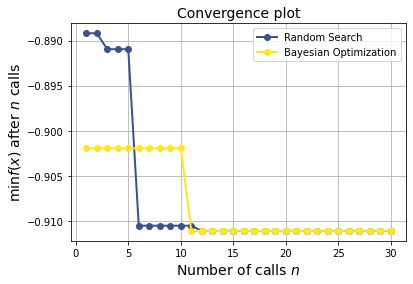

In [45]:
#Confrontando as duas técnicas
plot_convergence(('Random Search', resultado_RS), 
                 ('Bayesian Optimization', resultados_BO))
plt.legend(loc="best", prop={'size': 10}, numpoints=1)
plt.show()

In [46]:
print(f"Vamos prosseguir com os parâmetros escolhidos pela Bayesian Optimazation: {para_BO}")

Vamos prosseguir com os parâmetros escolhidos pela Bayesian Optimazation: ['gini', 20, 16]


In [47]:
# Configurando a pipeline com os parametros escolhidos

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('clf', DecisionTreeClassifier(criterion = 'gini',
                                                      max_depth = 20,
                                                      min_samples_leaf = 16,
                                                      random_state=42)
                       )
                       ]
                )
  
pipe.fit(X_train, y_train)

print(f"Se tratando de um pipeline de uma Decision Tree Classifier a métrica padrão é a precisão média.")
print(f"Score: {round(pipe.score(X_train, y_train), 2)}")

Se tratando de um pipeline de uma Decision Tree Classifier a métrica padrão é a precisão média.
Score: 0.83


Contudo esse valor sozinho é insuficiente para nos dar uma resposta sólida sobre o modelo.
Para modelos de classificação uma técnica bem usada é a matriz de confusão, ela nos mostra várias informações de como o modelo está se comportando. <br>
*However, this value alone is insufficient to give us a solid answer about the model.
For classification models a well used technique is the confusion matrix, it shows us various information about how the model is behaving.*

### 2.4 Cross_validation

Usaremos o cross validation para termos uma ideia de como os scores do modelo se comportam de forma mais generalizada. 
As métricas comumente mais usadas em problemas de classificação são descritas abaixo. <br>
*We'll use cross validation to get an idea of how the model's scores behave more generally.
The most commonly used metrics in classification problems are described below.*

Métricas:
- Precisão: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas (acurácia das predições positivas);
- Acurácia: indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;<br>

Aqui já cabe uma observação, acurácia não é a mesma coisa de precisão, embora muitas vezes sejam usados como sinônimos. A acurácia é uma especie de "soma" entre precisão e exatidão. Ou seja, nela os resultados não bastam serem precisos, devem estar o mais próximo do valor referência.
- Recall/Revocação/Sensibilidade: dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas (deverá ser o mais alto possível, nesse caso);
- F1-Score: média harmônica entre precisão e recall.
<br>
---
Metrics:
- Accuracy: among all the Positive class classifications that the model made, how many are correct (accuracy of positive predictions);
- Accuracy: indicates a general performance of the model. Of all the classifications, how many did the model classify correctly;<br>

Here, an observation is in order, accuracy is not the same thing as precision, although they are often used as synonyms. Accuracy is a kind of "sum" between precision and accuracy. That is, in it the results are not enough to be precise, they must be as close to the reference value as possible.
- Recall/Revocation/Sensitivity: among all situations with a Positive class as expected value, how many are correct (it should be as high as possible, in this case);
- F1-Score: harmonic mean between precision and recall.
---

Esse loop foi usado para verificar com quantos folds o modelo tem maior valor para o Recall, usando valores entre 2 e 15.<br>

*This loop was used to check how many folds the model has the highest value for Recall, using values between 2 and 15.*

In [50]:
#Cross-Validation
scoring = ['accuracy', 'precision', 'recall', 'f1']

valid_cruz = KFold(n_splits=11, 
                     random_state=42, 
                     shuffle=True)
  
# valid_cruz_strat = StratifiedKFold(n_splits=kfold, shuffle=True, 
#                                    random_state=42)
  
for score in scoring:
    cv_scores = cross_val_score(pipe['clf'], X_train, y_train,
                                cv=valid_cruz,
                                scoring=score
                                )
    print(f"{score} = {round(cv_scores.mean(), 2)}\n")

accuracy = 0.72

precision = 0.72

recall = 0.73

f1 = 0.71



### 2.5 Matriz confusão

Utilizando os resultados acima vamos construir nossa matriz de confusão. É precisso fazer predições para alimentar a matriz de confusão baseado no dataset de treino. Ela nos mostra o comportamento do modelo nas suas previsões, confrontando as predições da variável target com os valores reais.<br>

---
Using the results above we will build our confusion matrix. Predictions need to be made to feed the confusion matrix based on the training dataset. It shows us the behavior of the model in its predictions, comparing the predictions of the target variable with the real values.


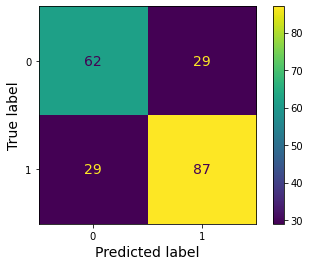


               precision    recall  f1-score   support

           0       0.68      0.68      0.68        91
           1       0.75      0.75      0.75       116

    accuracy                           0.72       207
   macro avg       0.72      0.72      0.72       207
weighted avg       0.72      0.72      0.72       207



In [51]:
#fazendo as predições/ Predictions
y_train_pred = cross_val_predict(pipe['clf'], X_train, y_train, cv=valid_cruz)

#criando a matriz de confusão/ Confusion Matrix
conf_mat = confusion_matrix(y_train, y_train_pred)

#plot da matriz/ Matrix plot
ConfusionMatrixDisplay(confusion_matrix=conf_mat, 
                       display_labels=pipe['clf'].classes_).plot()
plt.grid(False)
plt.show()

#criando um report para visualizar outras métricas
#creating a report to view other metrics
print("\n", classification_report(y_train, y_train_pred))

De acordo com nossa matriz de confusão:
* 62 verdadeiros negativos, ou seja, das pessoas que realmente tinha menor chance de ter um ataque cardíaco quantas o modelo classifou como tendo menor chance de ter um ataque cardíaco.
* 29 Falsos positivo, ou seja, o modelo previu como tendo Maior chance de ter um ataque cardíaco, mas que na verdade o paciente tem menor chance de ter um ataque.
* **29 Falsos negativo, pacientes que tem Maior chance de ter um ataque cardíaco, mas o modelo previu como tendo menor chance. Esse número traz maior preocupação, pois seriam pacientes que deveriam ser encaminhados para tratamentos e não serão de acordo com o modelo.**
* 87 Verdadeiros Positivos, pacientes com Maior chance de ter um ataque cardíaco e foram previstos corretamente pelo modelo.
---
According to our confusion matrix:
* 62 true negatives, that is, of the people who actually had a lower chance of having a heart attack, how many the model classified as having a lower chance of having a heart attack.
* 29 False positives, that is, the model predicted as having a greater chance of having a heart attack, but that in fact the patient has a lower chance of having an attack.
* **29 False negatives, patients who are more likely to have a heart attack but the model predicted as having a lower chance. This number brings greater concern, as they would be patients who should be referred for treatments and will not be according to the model.**
* 87 True Positives, patients most likely to have a heart attack and were correctly predicted by the model.

### 2.6 Trade-OFF Precisão x Recall

Threshold: todo modelo de classificação tem uma função ou um valor de decisão que divide os casos entre sendo da categoria alvo e não sendo. Esse valor é o limiar do modelo.

Para o threshold padrão = 0.5, temos a seguinte relação entre precisão e recall, utilizando as funções ```recall_score()``` e ```precision_score()```:


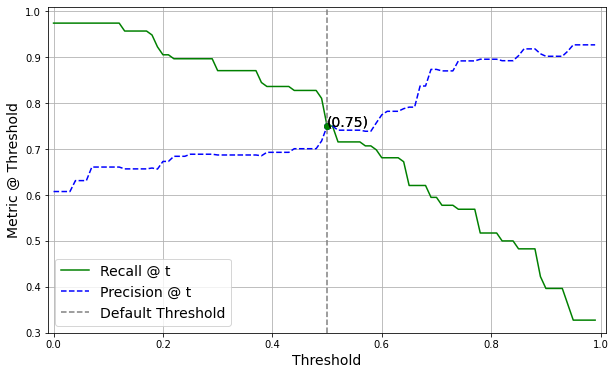

In [52]:
prob_pred = cross_val_predict(pipe['clf'], 
                              X_train, y_train,
                              cv=valid_cruz, 
                              method='predict_proba'
                              )[:,1]

threshold = 0.5
thresholds = np.arange(0, 1.0, step=0.01)
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold

recall_scores = [recall_score(y_train, prob_pred > t) for t in thresholds]
precis_scores = [precision_score(y_train, prob_pred > t) for t in thresholds]

fig, ax = plt.subplots(1, 1, figsize = (10,6))

ax.plot(thresholds, recall_scores, 'g-', label="Recall @ t")
ax.plot(thresholds, precis_scores, 'b--', label="Precision @ t")
ax.axvline(thresholds[idx], c="gray", linestyle="--", label="Default Threshold")
ax.set_xlabel("Threshold")
ax.set_ylabel("Metric @ Threshold")
ax.annotate('({})'.format(round(precis_scores[idx], 2)), 
            xy=(thresholds[idx], precis_scores[idx]))
ax.annotate('({})'.format(round(recall_scores[idx], 2)), 
            xy=(thresholds[idx], recall_scores[idx]))
plt.axis([-0.01, 1.01, 0.3, 1.01])

#fixando um threshold para o gráfico
plt.plot(thresholds[idx], precis_scores[idx], "bo")
plt.plot(thresholds[idx], recall_scores[idx], "go")
plt.grid()
ax.legend()
plt.show()

Agora o gráfico da Precisão x Recall

Recall: 0.75
Precision: 0.75


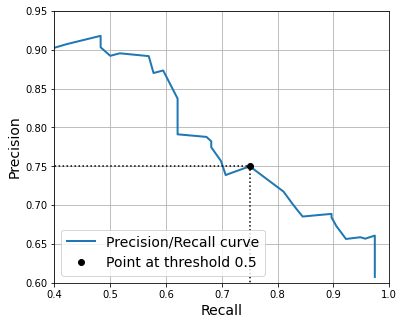

In [53]:
y_train_pred_prob = cross_val_predict(pipe['clf'], 
                                      X_train, y_train, 
                                      cv=valid_cruz, 
                                      method='predict_proba'
                                      )[:,1]

thresholds = np.arange(0, 1.0, step=0.01)

recall_scores = [recall_score(y_train, prob_pred > t) for t in thresholds]
precis_scores = [precision_score(y_train, prob_pred > t) for t in thresholds]

threshold = 0.5
idx = (thresholds >= threshold).argmax() 

print(f'Recall: {round(recall_scores[idx], 2)}')
print(f'Precision: {round(precis_scores[idx], 2)}')

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting


plt.plot(recall_scores, precis_scores, linewidth=2, label="Precision/Recall curve")

plt.plot([recall_scores[idx], recall_scores[idx]], [0., precis_scores[idx]], "k:")
plt.plot([0.0, recall_scores[idx]], [precis_scores[idx], precis_scores[idx]], "k:")
plt.plot([recall_scores[idx]], [precis_scores[idx]], "ko",
         label="Point at threshold "+str(threshold))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0.4, 1, 0.6, 0.95])
plt.grid()
plt.legend(loc="lower left")

plt.show()

É observado em diferentes gráficos acima como é a relação entre Precisão e Recall, para este caso, e quais os valores para o threshold padrão de 0.5. <br>
Precisão = 0.75 <br>
Recall = 0.75

---
It is observed in different graphs above how is the relationship between Precision and Recall, for this case, and what are the values for the default threshold of 0.5. <br>
Accuracy = 0.75 <br>
Recall = 0.75

Pelo gráfico da Métrica do Threshold é possível ver visualmente que com um threshold = 0.12, vamos obter um recall = 97,4%

---
By the Threshold Metric graph, it is possible to visually see that with a threshold = 0.12, we will obtain a recall = 97.4%

In [82]:
threshold_for_97_recall = 0.12
y_train_pred_97_recall = (y_train_pred_prob >= threshold_for_97_recall)

In [83]:
print("Precision: ", round(precision_score(y_train, y_train_pred_97_recall), 3))
print("Recall: ", round(recall_score(y_train, y_train_pred_97_recall), 3))

Precision:  0.661
Recall:  0.974


Agora temos uma matriz confusão com recall de 97% e uma quantidade de Falsos Negativos muito baixa.

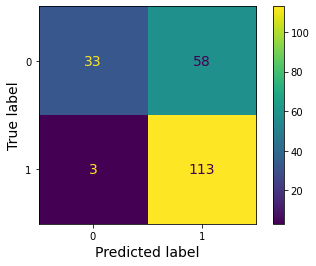


               precision    recall  f1-score   support

           0       0.92      0.36      0.52        91
           1       0.66      0.97      0.79       116

    accuracy                           0.71       207
   macro avg       0.79      0.67      0.65       207
weighted avg       0.77      0.71      0.67       207



In [85]:
#criando a matriz de confusão/ Confusion Matrix
conf_mat = confusion_matrix(y_train, y_train_pred_97_recall)

#plot da matriz/ Matrix plot
ConfusionMatrixDisplay(confusion_matrix=conf_mat, 
                       display_labels=pipe['clf'].classes_).plot()
plt.grid(False)
plt.show()

#criando um report para visualizar outras métricas
#creating a report to view other metrics 
print("\n", classification_report(y_train, y_train_pred_97_recall))

Agora o total de Falsos Negativos caiu para 3.

---
Now the False Negatives total is down to 3.

Recall: 0.97
Precision: 0.66


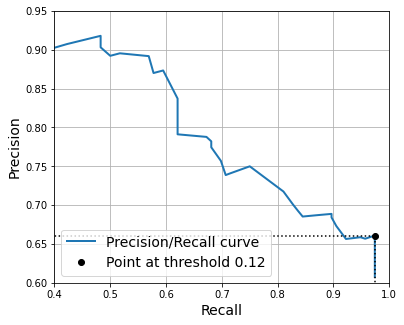

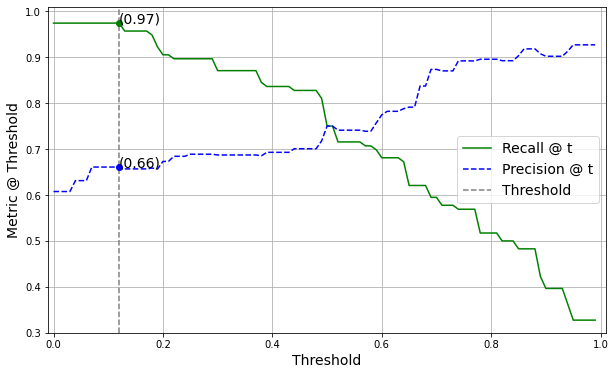

In [87]:
y_train_pred_prob = cross_val_predict(pipe['clf'], 
                                      X_train, y_train, 
                                      cv=valid_cruz, 
                                      method='predict_proba'
                                      )[:,1]

thresholds = np.arange(0, 1.0, step=0.01)

recall_scores = [recall_score(y_train, prob_pred > t) for t in thresholds]
precis_scores = [precision_score(y_train, prob_pred > t) for t in thresholds]

threshold = threshold_for_97_recall
idx = (thresholds >= threshold).argmax() 

print(f'Recall: {round(recall_scores[idx], 2)}')
print(f'Precision: {round(precis_scores[idx], 2)}')

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting


plt.plot(recall_scores, precis_scores, linewidth=2, label="Precision/Recall curve")

plt.plot([recall_scores[idx], recall_scores[idx]], [0., precis_scores[idx]], "k:")
plt.plot([0.0, recall_scores[idx]], [precis_scores[idx], precis_scores[idx]], "k:")
plt.plot([recall_scores[idx]], [precis_scores[idx]], "ko",
         label="Point at threshold "+str(threshold))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0.4, 1, 0.6, 0.95])
plt.grid()
plt.legend(loc="lower left")

plt.show()

prob_pred = cross_val_predict(pipe['clf'], 
                              X_train, y_train,
                              cv=valid_cruz, 
                              method='predict_proba'
                              )[:,1]

threshold = threshold_for_97_recall
thresholds = np.arange(0, 1.0, step=0.01)
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold

recall_scores = [recall_score(y_train, prob_pred > t) for t in thresholds]
precis_scores = [precision_score(y_train, prob_pred > t) for t in thresholds]

fig, ax = plt.subplots(1, 1, figsize = (10,6))

ax.plot(thresholds, recall_scores, 'g-', label="Recall @ t")
ax.plot(thresholds, precis_scores, 'b--', label="Precision @ t")
ax.axvline(thresholds[idx], c="gray", linestyle="--", label="Threshold")
ax.set_xlabel("Threshold")
ax.set_ylabel("Metric @ Threshold")
ax.annotate('({})'.format(round(precis_scores[idx], 2)), 
            xy=(thresholds[idx], precis_scores[idx]))
ax.annotate('({})'.format(round(recall_scores[idx], 2)), 
            xy=(thresholds[idx], recall_scores[idx]))
plt.axis([-0.01, 1.01, 0.3, 1.01])

#fixando um threshold para o gráfico/ setting a threshold for the graph
plt.plot(thresholds[idx], precis_scores[idx], "bo")
plt.plot(thresholds[idx], recall_scores[idx], "go")
plt.grid()
ax.legend()
plt.show()

### 2.7 Curva ROC/ ROC curve

In [88]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob) #relembrando a equação

idx_for_threshold_at_97r = (thresholds <= threshold_for_97_recall).argmax()
tpr_97r, fpr_97r = tpr[idx_for_threshold_at_97r], fpr[idx_for_threshold_at_97r]

roc_auc_score for this DecisionTree:  0.81 



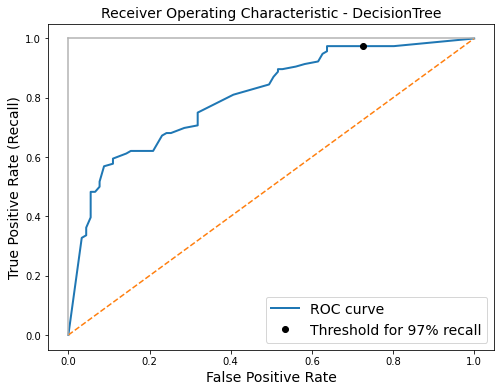

In [89]:
# curva para o threshold = 0.12/ # curve for threshold = 0.12
y_train_pred_prob = cross_val_predict(pipe['clf'], 
                                      X_train, y_train, 
                                      cv=valid_cruz, 
                                      method='predict_proba'
                                      )[:,1] 

plt.subplots(1, figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")

#curva para o threshold com recall de 97%
plt.plot([fpr_97r], [tpr_97r], 'ko', label='Threshold for 97% recall')

print('roc_auc_score for this DecisionTree: ', 
      round(roc_auc_score(y_train, y_train_pred_prob),2), 
      '\n')


plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (Recall)')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()